In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
default_of_credit_card_clients = fetch_ucirepo(id=350) 
  
# data (as pandas dataframes) 
X = default_of_credit_card_clients.data.features 
y = default_of_credit_card_clients.data.targets 
  
# metadata 
#print(default_of_credit_card_clients.metadata) 
  
# variable information 
print(default_of_credit_card_clients.variables) 

   name     role     type      demographic                 description units  \
0    ID       ID  Integer             None                        None  None   
1    X1  Feature  Integer             None                   LIMIT_BAL  None   
2    X2  Feature  Integer              Sex                         SEX  None   
3    X3  Feature  Integer  Education Level                   EDUCATION  None   
4    X4  Feature  Integer   Marital Status                    MARRIAGE  None   
5    X5  Feature  Integer              Age                         AGE  None   
6    X6  Feature  Integer             None                       PAY_0  None   
7    X7  Feature  Integer             None                       PAY_2  None   
8    X8  Feature  Integer             None                       PAY_3  None   
9    X9  Feature  Integer             None                       PAY_4  None   
10  X10  Feature  Integer             None                       PAY_5  None   
11  X11  Feature  Integer             No

In [28]:
print(default_of_credit_card_clients.variables) 

   name     role     type      demographic                 description units  \
0    ID       ID  Integer             None                        None  None   
1    X1  Feature  Integer             None                   LIMIT_BAL  None   
2    X2  Feature  Integer              Sex                         SEX  None   
3    X3  Feature  Integer  Education Level                   EDUCATION  None   
4    X4  Feature  Integer   Marital Status                    MARRIAGE  None   
5    X5  Feature  Integer              Age                         AGE  None   
6    X6  Feature  Integer             None                       PAY_0  None   
7    X7  Feature  Integer             None                       PAY_2  None   
8    X8  Feature  Integer             None                       PAY_3  None   
9    X9  Feature  Integer             None                       PAY_4  None   
10  X10  Feature  Integer             None                       PAY_5  None   
11  X11  Feature  Integer             No

In [5]:
X.shape

(30000, 23)

In [4]:
y.shape

(30000, 1)

In [5]:
y.value_counts()

Y
0    23364
1     6636
Name: count, dtype: int64

In [6]:
df_credit = pd.DataFrame(data = X)

In [17]:
df_credit.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [7]:
# Add target variable
df_credit['class']= y

In [23]:
df_credit.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'class'],
      dtype='object')

In [21]:
df_credit[['X1','X18','X6','class']].describe()

,X1,X18,X6,class
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,5663.580500,-0.016700,0.221200
std,129747.661567,16563.280354,1.123802,0.415062
min,10000.000000,0.000000,-2.000000,0.000000
25%,50000.000000,1000.000000,-1.000000,0.000000
50%,140000.000000,2100.000000,0.000000,0.000000
75%,240000.000000,5006.000000,0.000000,0.000000
max,1000000.000000,873552.000000,8.000000,1.000000


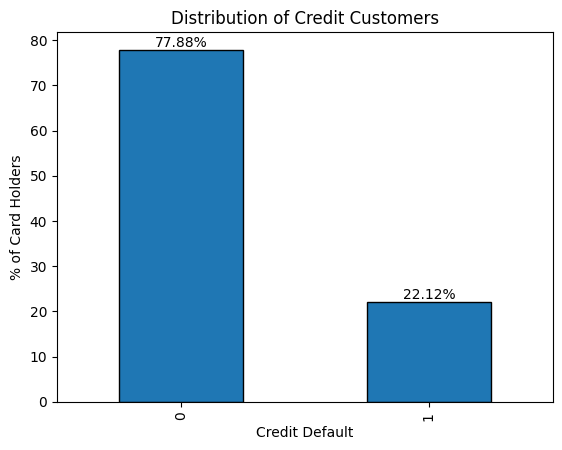

In [19]:
# visualize two classes
class_counts= df_credit["class"].value_counts(normalize=True) * 100

# Plot the bar chart
class_counts.plot(kind='bar', edgecolor='black')

# Add axis titles
plt.xlabel('Credit Default')
plt.ylabel('% of Card Holders')
plt.title('Distribution of Credit Customers')

# Add percentage labels on top of the bars
for index, value in enumerate(class_counts):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

In [21]:
# Calculate correlation matrix of all features
correlation_matrix = df_credit.corr()

# Extract correlation of features with the target variable
target_corr = correlation_matrix['class'].sort_values(ascending=False)

# Display the correlation values
#print(target_corr)


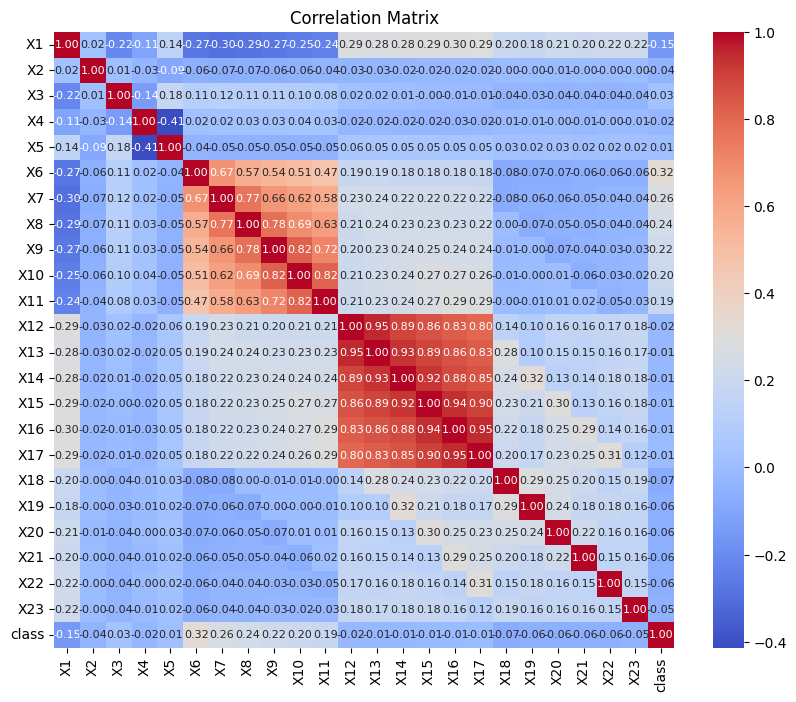

In [32]:
# visualize correlation matrix
# Create a heatmap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title("Correlation Matrix")
plt.show()


In [25]:
# Calculate correlation with the target variable
target_corr1 = df_credit.corr()['class'].sort_values(ascending=False)

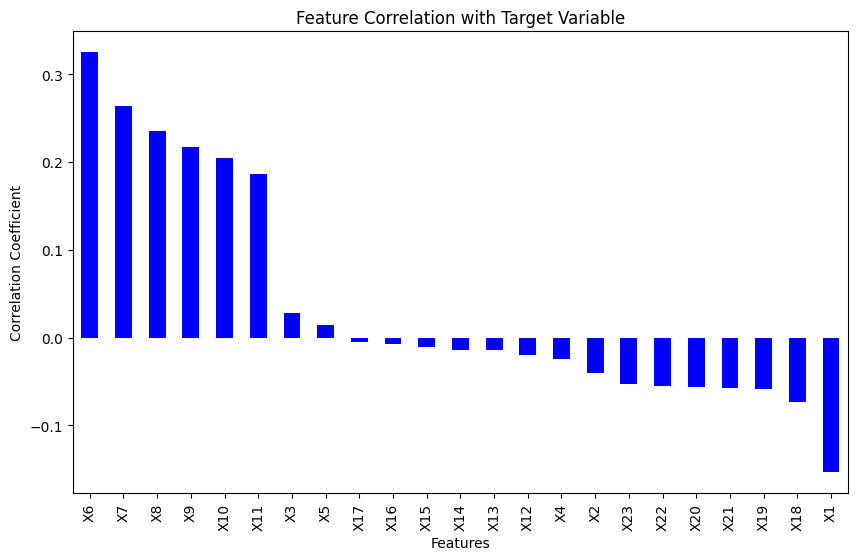

In [31]:
plt.figure(figsize=(10, 6))
target_corr1.drop('class').plot(kind='bar',color = 'blue')
plt.title("Feature Correlation with Target Variable")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()

In [27]:
target_corr1

class    1.000000
X6       0.324794
X7       0.263551
X8       0.235253
X9       0.216614
X10      0.204149
X11      0.186866
X3       0.028006
X5       0.013890
X17     -0.005372
X16     -0.006760
X15     -0.010156
X14     -0.014076
X13     -0.014193
X12     -0.019644
X4      -0.024339
X2      -0.039961
X23     -0.053183
X22     -0.055124
X20     -0.056250
X21     -0.056827
X19     -0.058579
X18     -0.072929
X1      -0.153520
Name: class, dtype: float64

In [37]:
df_credit.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,class
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X_new = imputer.transform(X)
print(X_new)

[[2.0000e+04 2.0000e+00 2.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.2000e+05 2.0000e+00 2.0000e+00 ... 1.0000e+03 0.0000e+00 2.0000e+03]
 [9.0000e+04 2.0000e+00 2.0000e+00 ... 1.0000e+03 1.0000e+03 5.0000e+03]
 ...
 [3.0000e+04 1.0000e+00 2.0000e+00 ... 4.2000e+03 2.0000e+03 3.1000e+03]
 [8.0000e+04 1.0000e+00 3.0000e+00 ... 1.9260e+03 5.2964e+04 1.8040e+03]
 [5.0000e+04 1.0000e+00 2.0000e+00 ... 1.0000e+03 1.0000e+03 1.0000e+03]]


In [41]:
print("IsNull Any: ",X.isnull().any().any())

IsNull Any:  False


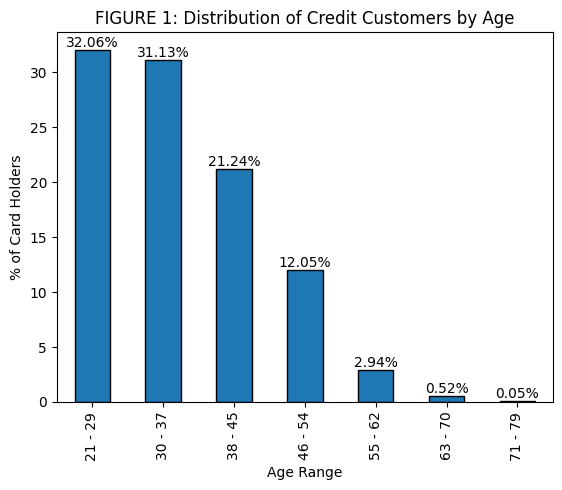

In [81]:
# visualize Age
df_credit['Age'] = pd.cut(df_credit['X5'], bins=7,labels= bin_stats['range'].values)
age_counts= df_credit["Age"].value_counts(normalize=True) * 100

# Plot the bar chart
age_counts.plot(kind='bar', edgecolor='black')

# Add axis titles
plt.xlabel('Age Range')
plt.ylabel('% of Card Holders')
plt.title('FIGURE 1: Distribution of Credit Customers by Age')

# Add percentage labels on top of the bars
for index, value in enumerate(age_counts):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

In [58]:
df_credit['X5_Age'] = pd.cut(df_credit['X5'], bins=7,labels=False)

In [60]:
df_credit['X5_Age'].unique()


array([0, 1, 4, 3, 2, 5, 6], dtype=int64)

In [61]:
bin_stats = df_credit.groupby('X5_Age')['X5'].agg(['max', 'min'])
bin_stats['range'] = bin_stats['min'].astype(str) + ' - ' + bin_stats['max'].astype(str)

In [54]:
bin_stats = df_credit.groupby('X5_Age')['X5'].agg(['max', 'min'])

In [68]:
bin_stats['range'].values

array(['21 - 29', '30 - 37', '38 - 45', '46 - 54', '55 - 62', '63 - 70',
       '71 - 79'], dtype=object)

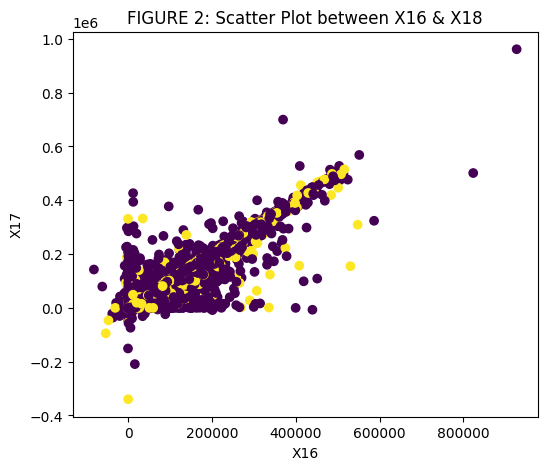

In [48]:
import matplotlib.pyplot as plt


# Define variables
xx = df_credit['X16']
yy = df_credit['X17']
classes = df_credit['class']

# Create scatter plot
plt.figure(figsize=(6, 5))
scatter = plt.scatter(xx, yy, c=classes, cmap='viridis', marker='o')
plt.title('FIGURE 2: Scatter Plot between X16 & X18')
plt.xlabel('X16')
plt.ylabel('X17')



plt.show()

In [41]:
# apply SMOTE to variables
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(df_credit[['X16','X17']], df_credit['class'])

#print('Resampled dataset shape %s' % Counter(y_res))


In [59]:
# apply SMOTE to entire dataset

df_credit_smote = sm.fit_resample(df_credit.iloc[:,:-1], df_credit.iloc[:,-1])

In [72]:
df_credit_smote[1].value_counts()

class
1    23364
0    23364
Name: count, dtype: int64

In [74]:
df_credit_smote[1].describe()

count    46728.000000
mean         0.500000
std          0.500005
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: class, dtype: float64

In [73]:
df_credit['class'].value_counts()

class
0    23364
1     6636
Name: count, dtype: int64

In [55]:
df_credit['class'].describe()

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: class, dtype: float64

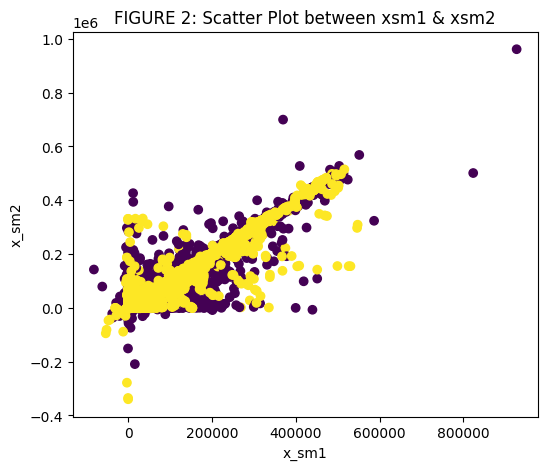

In [50]:
# dataset after SMOTE
import matplotlib.pyplot as plt


# Define variables
X_sm1 = X_sm.iloc[:,0]
X_sm2 = X_sm.iloc[:,1]
class_sm = y_sm

# Create scatter plot
plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_sm1, X_sm2, c=class_sm, cmap='viridis', marker='o')
plt.title('FIGURE 2: Scatter Plot between xsm1 & xsm2')
plt.xlabel('x_sm1')
plt.ylabel('x_sm2')


plt.show()